<a href="https://colab.research.google.com/github/umerjavaidkh/machine_learning_basics/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
#fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist
df = pd.read_csv("magic04.data", names=columns)
df.head()

fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      g
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      g
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      g
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      g
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      g

[5 rows x 11 columns]

In [9]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

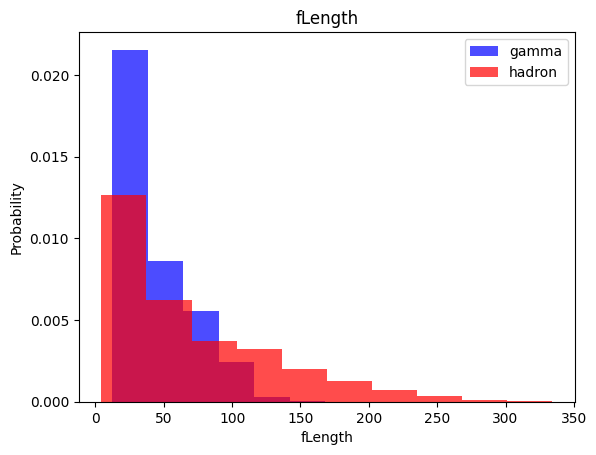

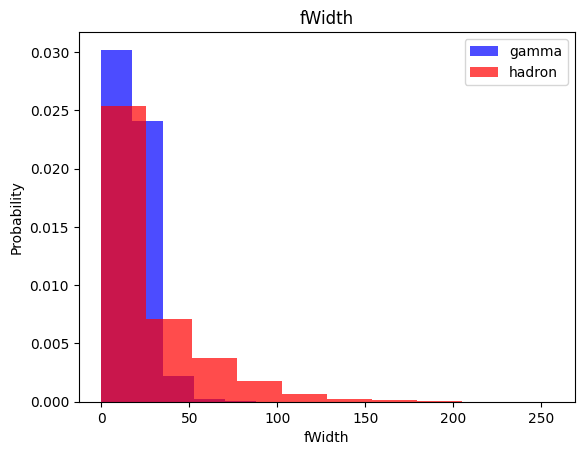

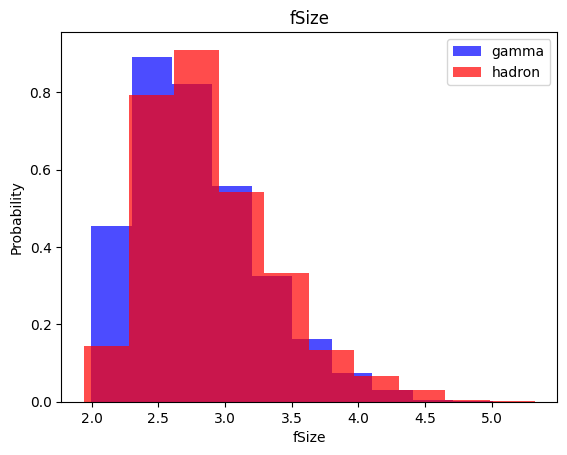

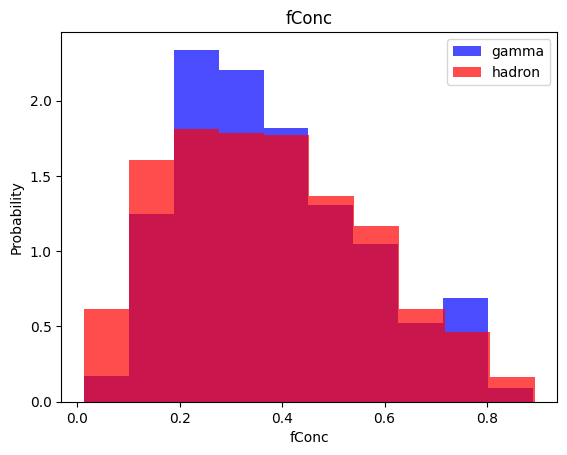

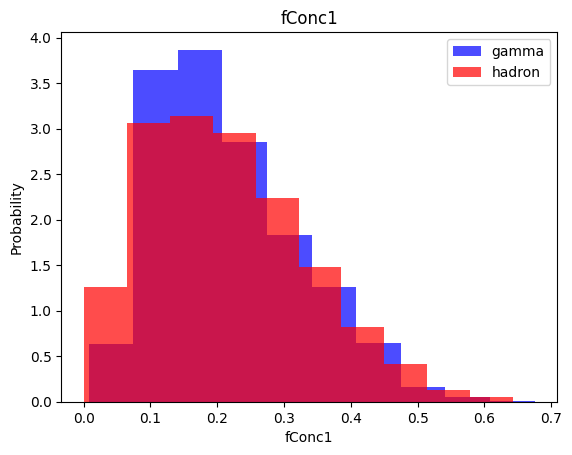

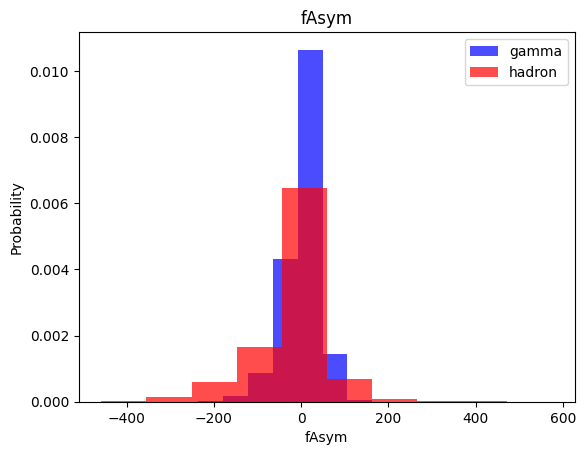

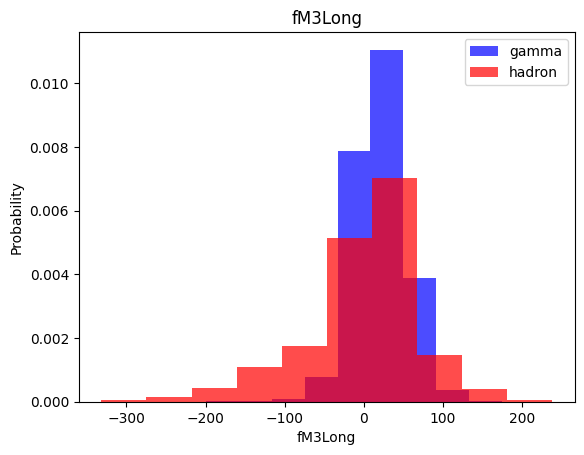

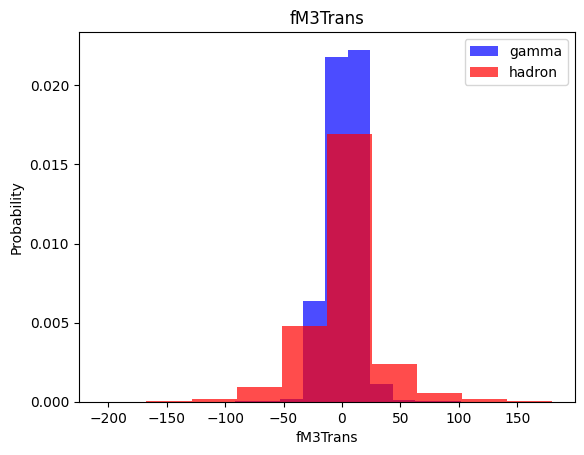

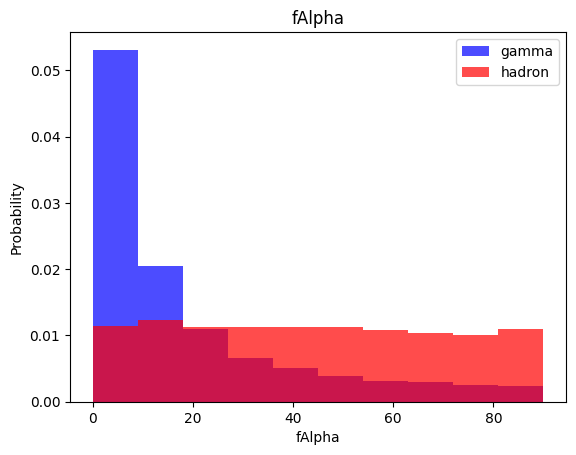

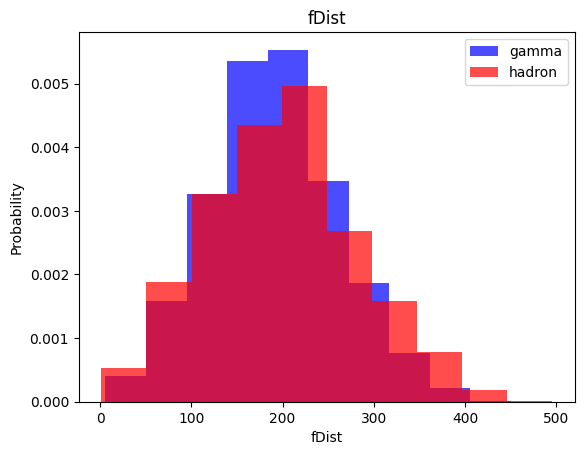

In [10]:
for label in columns[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [22]:
df[df["class"]==1][label]

0         81.8828
1        205.2610
2        256.7880
3        116.7370
4        356.4620
           ...   
12327    204.0370
12328    205.4980
12329    123.2810
12330    197.2090
12331    171.2270
Name: fDist, Length: 12332, dtype: float64

In [11]:
train, valid, test = np.split(df.sample(frac=1), [ int(0.6*len(df)), int(0.8*len(df)) ])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
total_size = train.size + valid.size + test.size

train_percentage = train.size/total_size
print(f"{train_percentage * 100:.2f}%")
valid_percentage = valid.size/total_size
print(f"{valid_percentage * 100:.2f}%")
test_percentage = test.size/total_size
print(f"{test_percentage * 100:.2f}%")


60.00%
20.00%
20.00%


In [15]:
def scale_data_set(data_frame, oversample=False):
    x = data_frame[data_frame.columns[:-1]].values
    y = data_frame[data_frame.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y

In [16]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values



In [17]:
train, x_train, y_train=scale_data_set(train,oversample=True)

In [18]:
len(y_train[y_train==1])

7383

In [19]:
valid, x_valid, y_valid=scale_data_set(valid,oversample=False)
test, x_test, y_test=scale_data_set(test,oversample=False)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
# we are doing taining of model here

KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(x_test)

In [23]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [24]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [33]:
#help(classification_report)

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1367
           1       0.85      0.87      0.86      2437

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



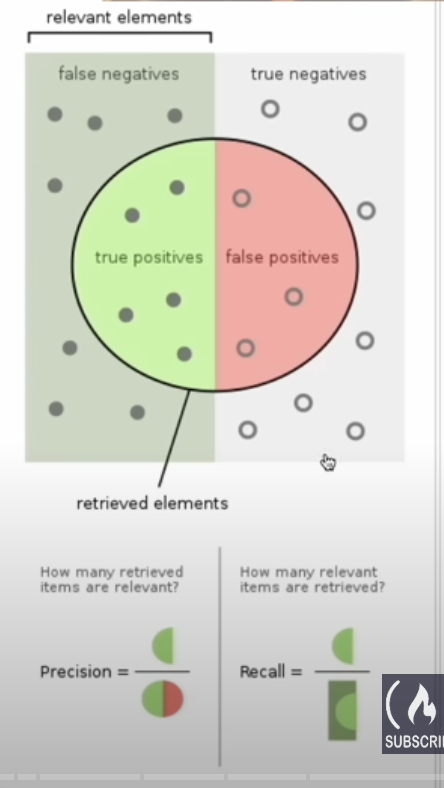

---



In [37]:
nbm = GaussianNB()
nbm.fit(x_train, y_train)

y_pred = nbm.predict(x_test)

In [38]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1367
           1       0.73      0.91      0.81      2437

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lrm = LogisticRegression()
lrm.fit(x_train, y_train)

lrm_y_pred = lrm.predict(x_test)

lrm_class_report = classification_report(y_test, lrm_y_pred)
print(lrm_class_report)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1367
           1       0.84      0.83      0.84      2437

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC()
svc.fit(x_train, y_train)

svc_y_pred = svc.predict(x_test)

svc_class_report = classification_report(y_test, svc_y_pred)
print(svc_class_report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1367
           1       0.88      0.91      0.90      2437

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [60]:
def plot_history(history):
    """Plot training and validation accuracy."""
    fig, (x1, x2) = plt.subplots(1, 2)
    x1.plot(history.history['loss'], label='Train Loss')
    x1.plot(history.history['val_loss'], label='Validation Loss')
    x1.set_xlabel('Epoch')
    x1.set_ylabel('Binary Cross Entopy')
    x1.grid(True)

    x2.plot(history.history['accuracy'], label='Train Accuracy')
    x2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    x2.set_xlabel('Epoch')
    x2.set_ylabel('Accuracy')
    x2.grid(True)

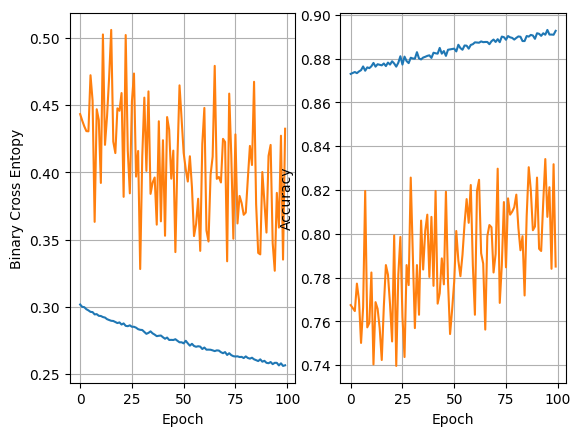

In [61]:
plot_history(history)

In [53]:
import tensorflow as tf

In [63]:
def train_nn_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    """Train a neural network model."""
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history


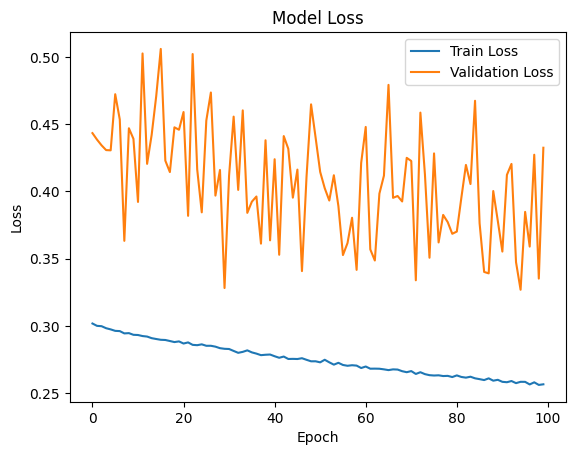

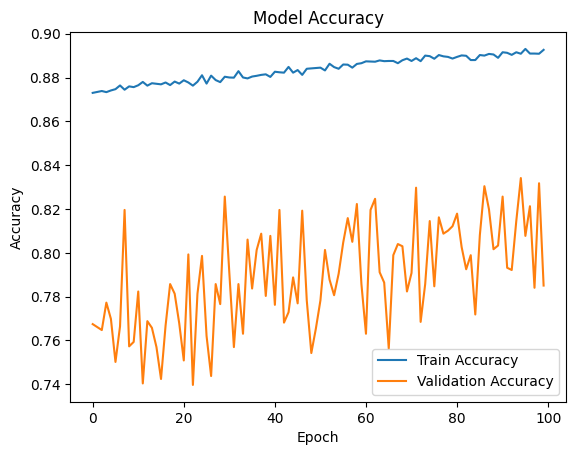

In [51]:
plot_loss(history)
plot_accuracy(history)

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3271
Validation loss: 0.8732912540435791
16 nodes, dropout 0, lr 0.01, batch size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.3077
Validation loss: 0.8722397685050964
16 nodes, dropout 0, lr 0.01, batch size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.3304
Validation loss: 0.8740799427032471
16 nodes, dropout 0, lr 0.005, batch size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 0.3125
Validation loss: 0.8764458298683167
16 nodes, dropout 0, lr 0.005, batch size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3168
Validation loss: 0.8722397685050964
16 nodes, dropout 0, lr 0.005, batch size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.3104
Validation loss: 0.8777602314949036
16 nodes, dropout 0, lr 0.001, batch size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - lo

<ipython-input-60-ccad75571168>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (x1, x2) = plt.subplots(1, 2)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3868
Validation loss: 0.8664563894271851
32 nodes, dropout 0, lr 0.005, batch size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.3710
Validation loss: 0.8654048442840576
32 nodes, dropout 0, lr 0.005, batch size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3407
Validation loss: 0.8633018136024475
32 nodes, dropout 0, lr 0.005, batch size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8656 - loss: 0.3383
Validation loss: 0.8664563894271851
32 nodes, dropout 0, lr 0.001, batch size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.3083  
Validation loss: 0.8717139959335327
32 nodes, dropout 0, lr 0.001, batch size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3068
Validation loss: 0.8730283975601196
32 nodes, dropout 0, lr 0.001, batch size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 

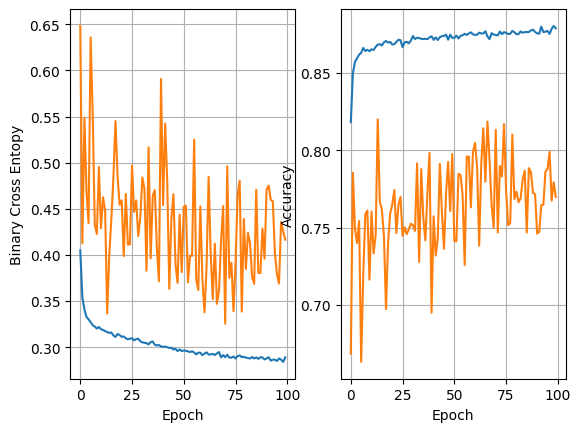

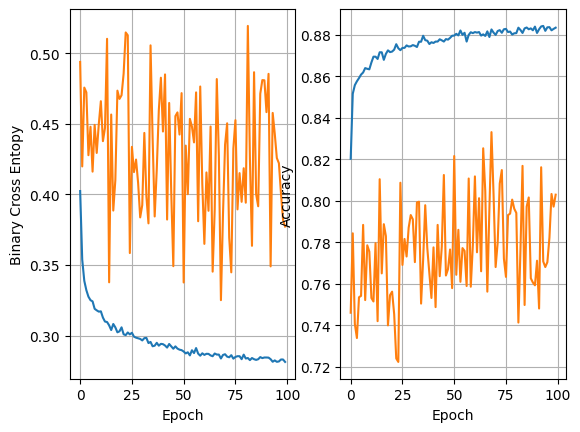

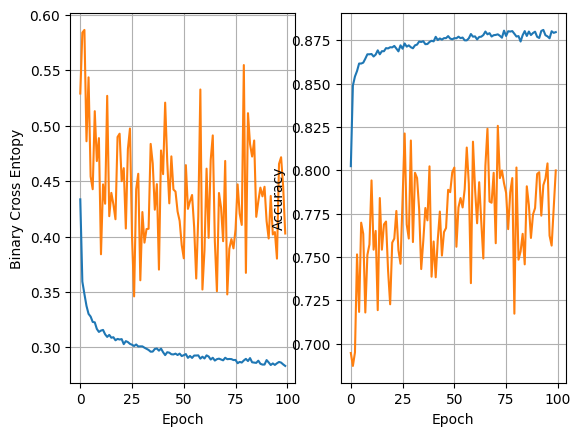

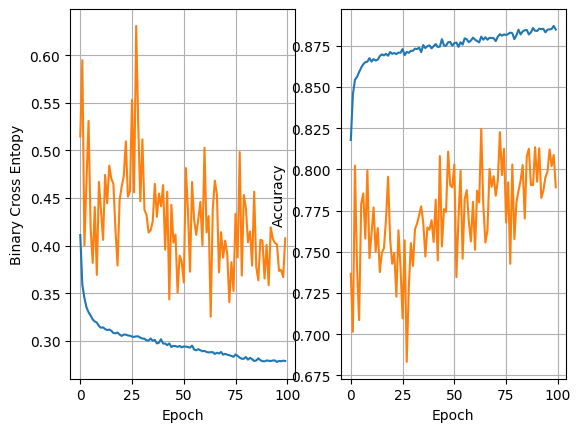

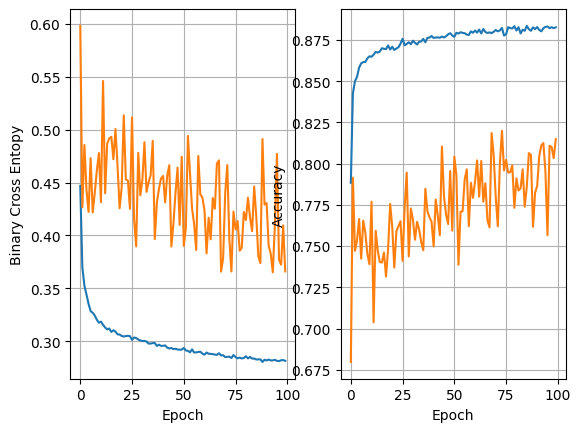

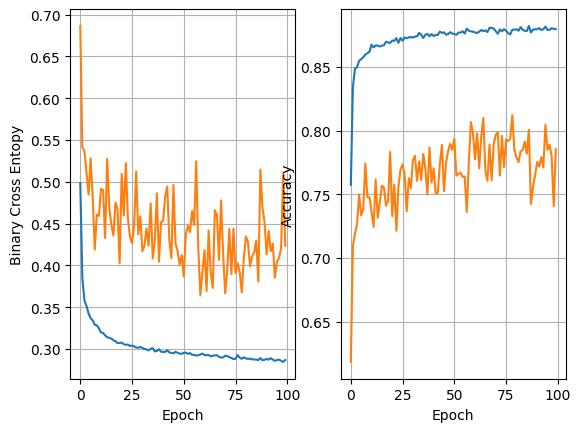

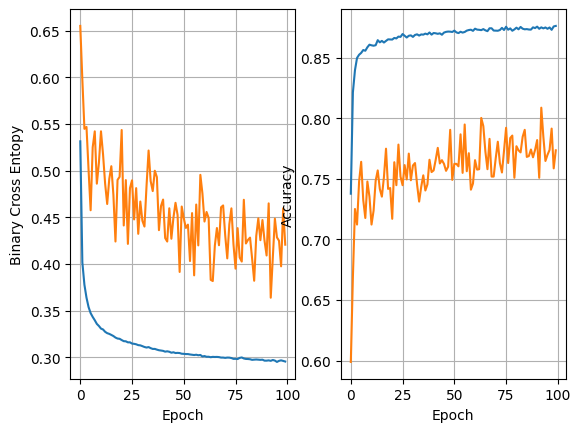

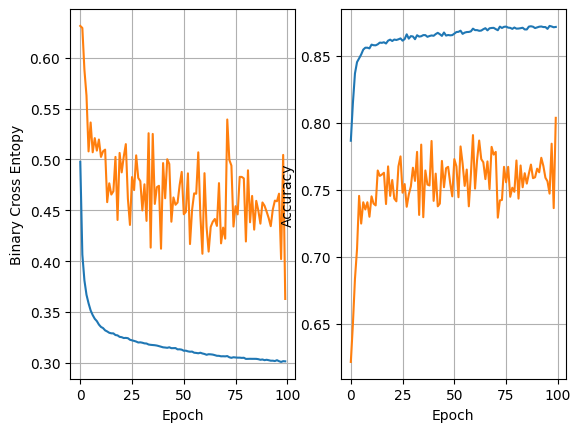

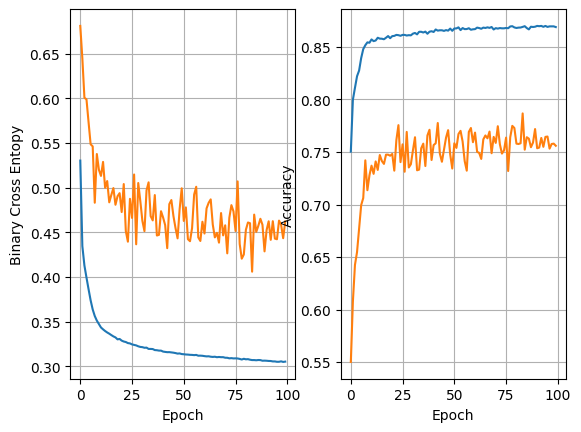

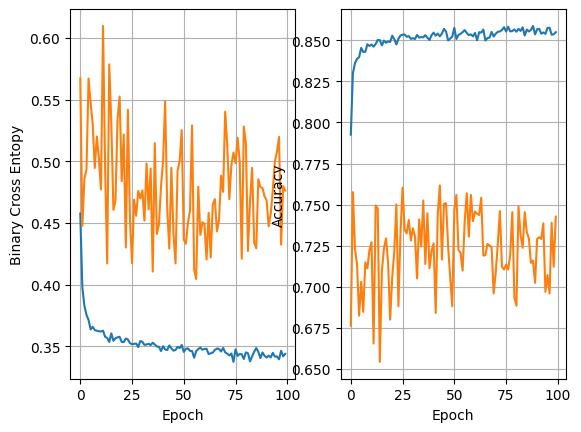

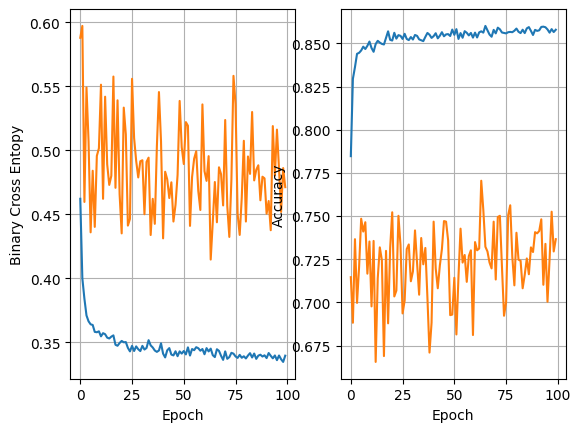

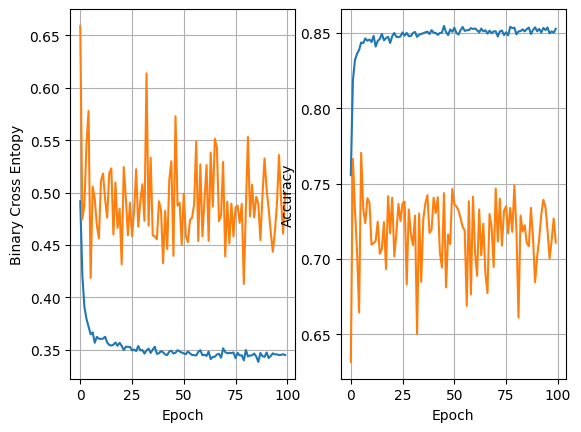

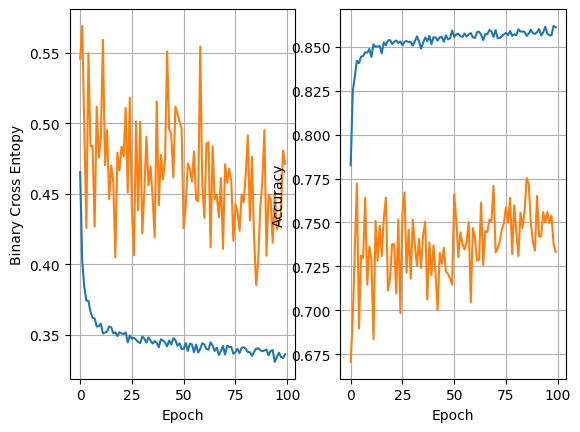

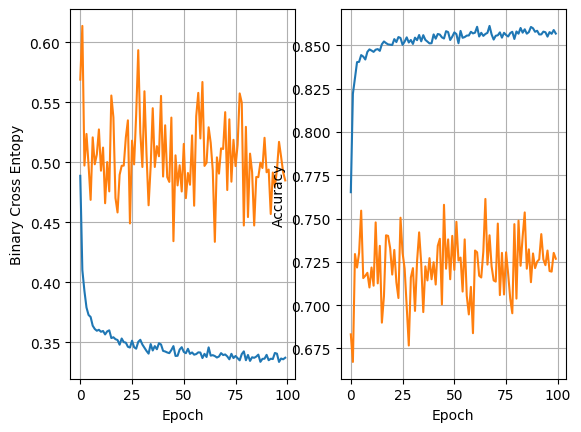

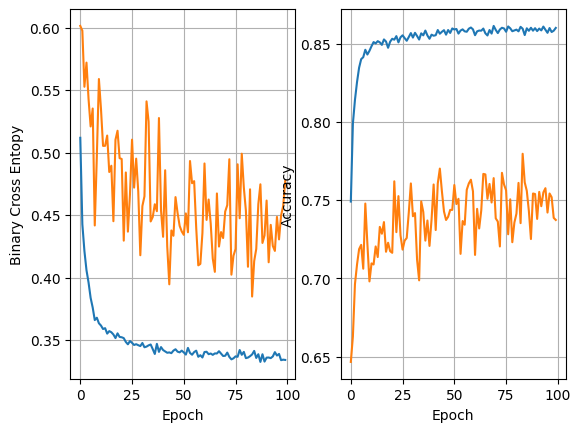

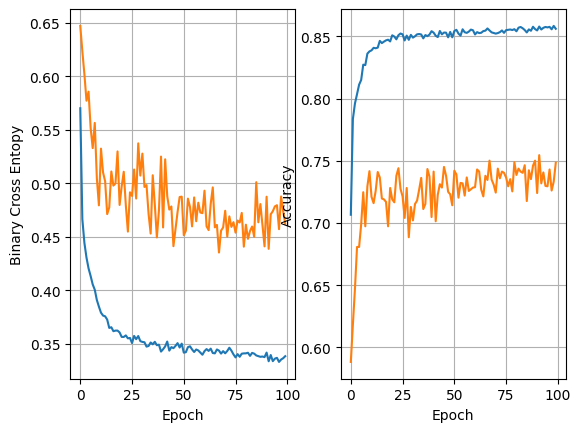

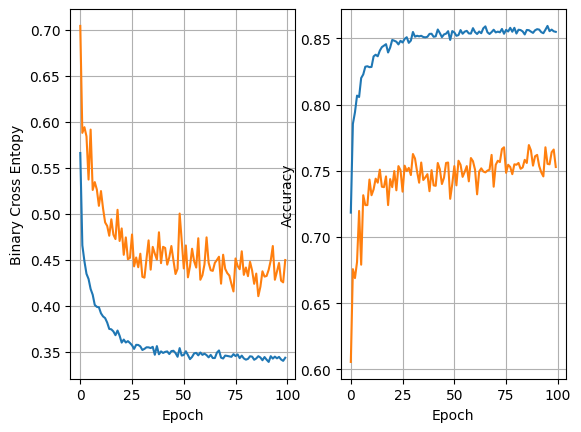

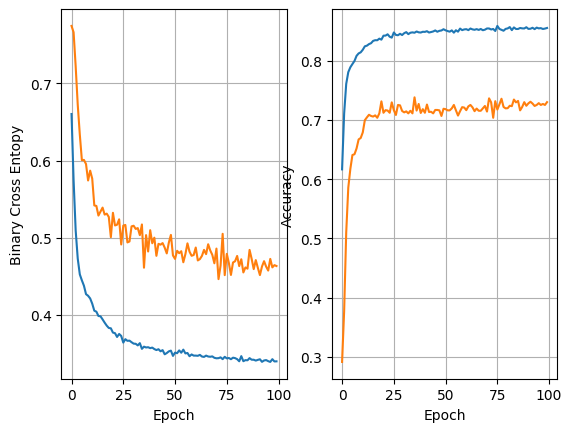

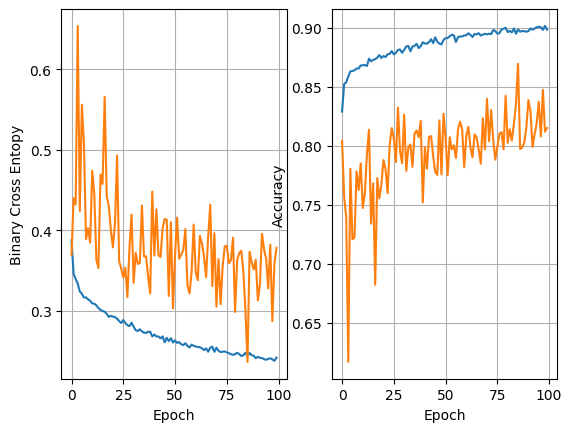

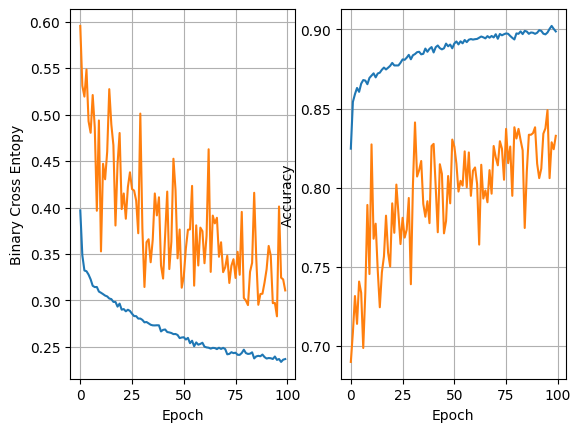

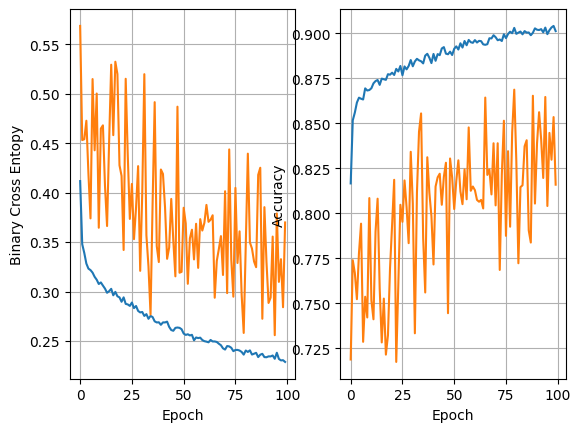

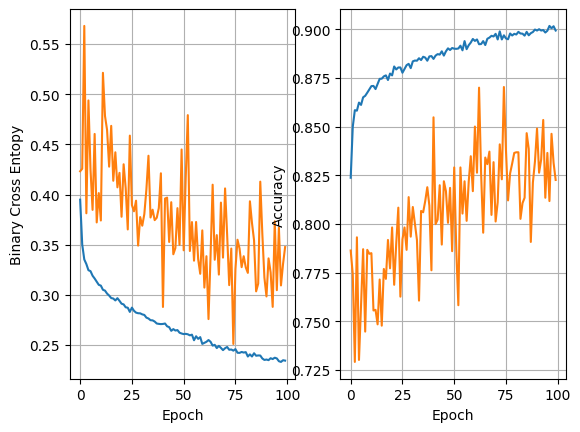

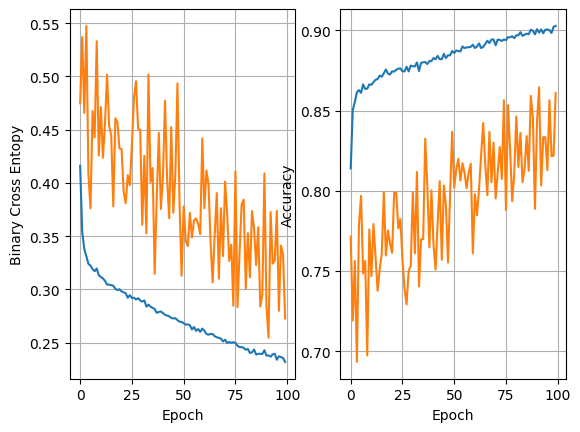

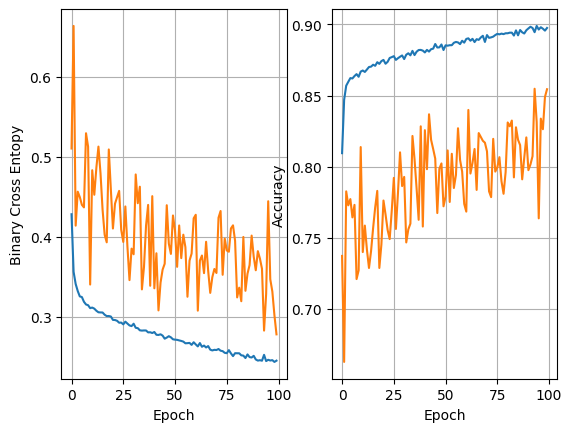

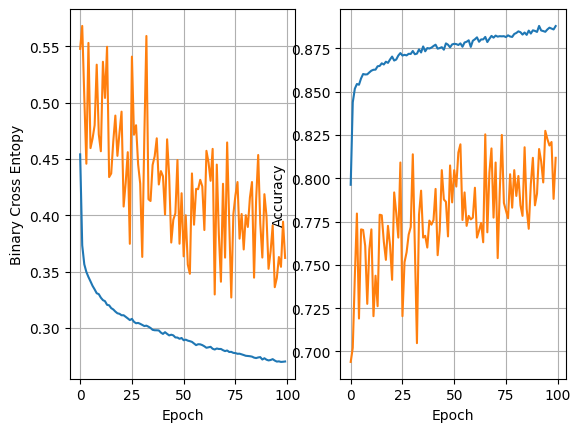

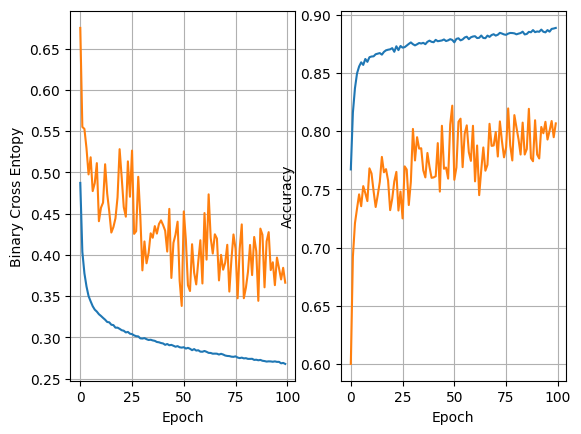

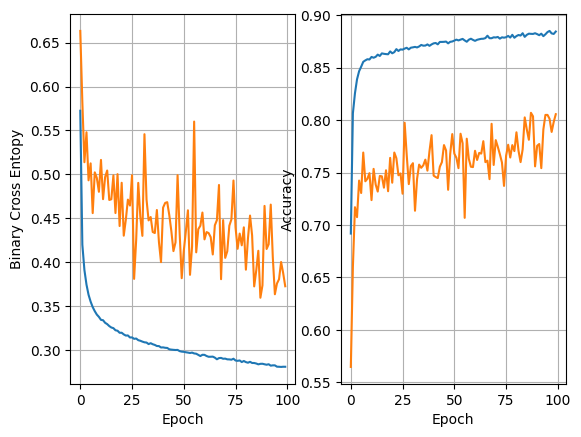

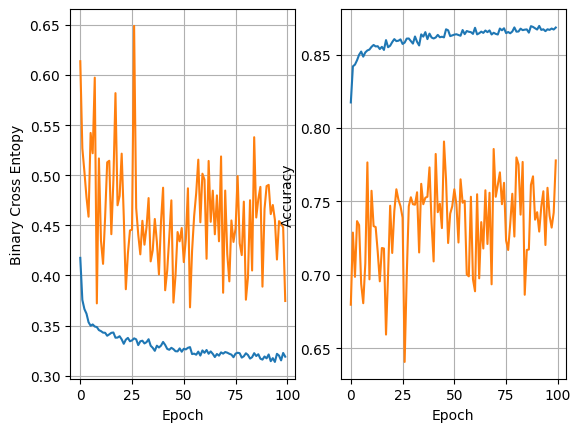

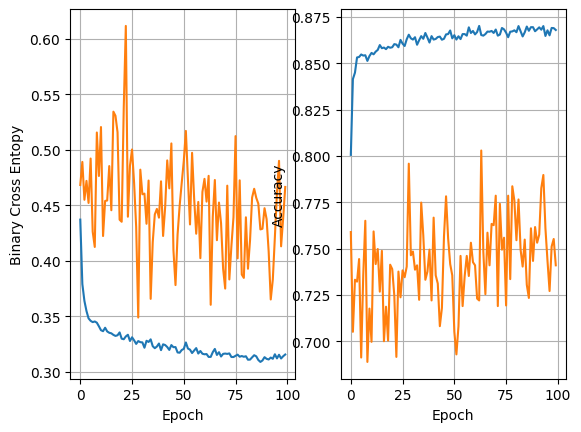

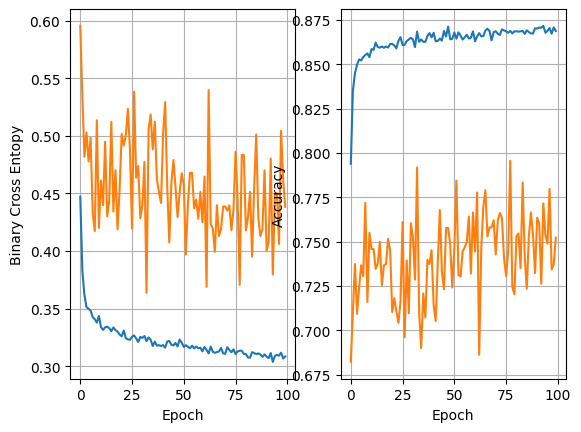

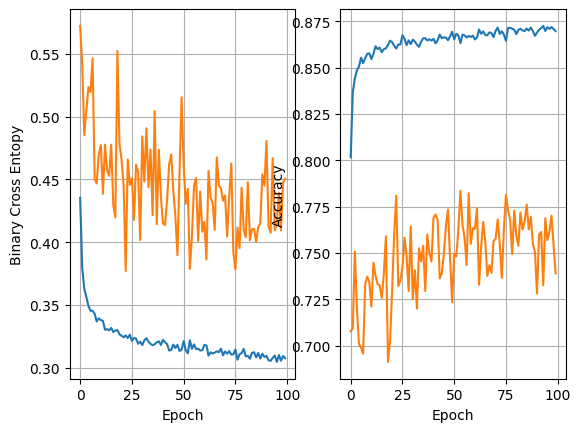

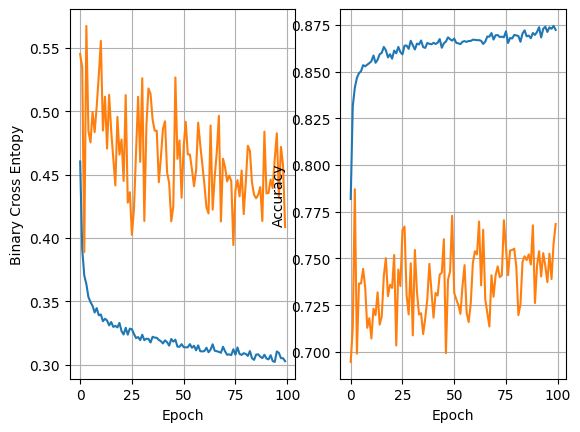

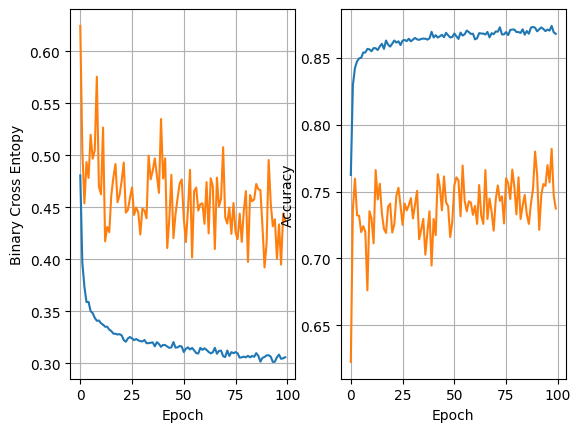

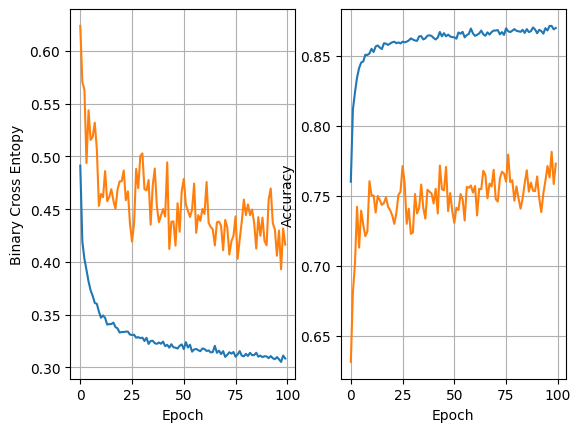

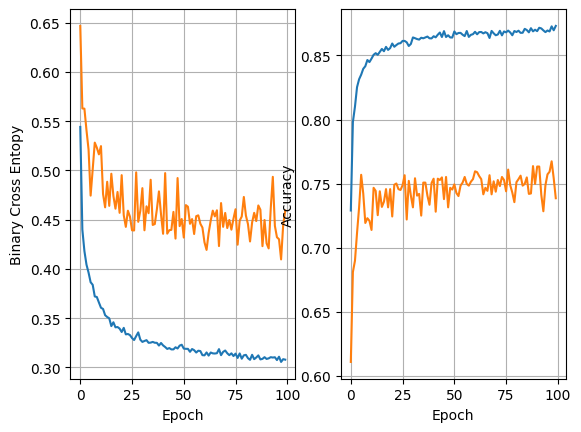

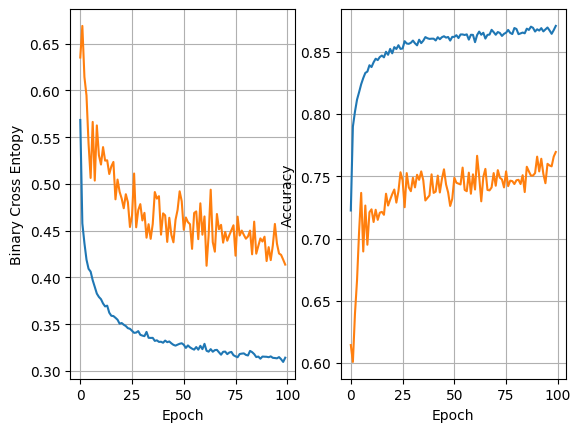

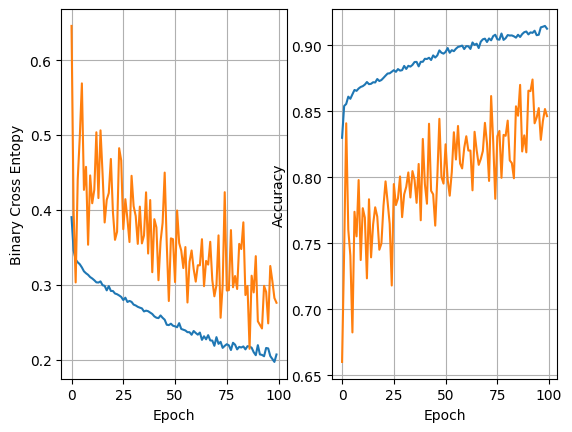

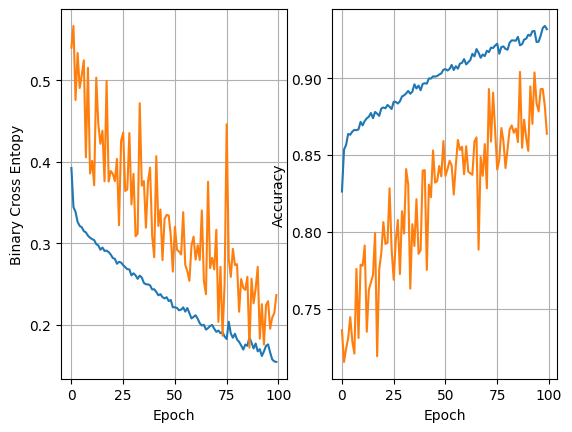

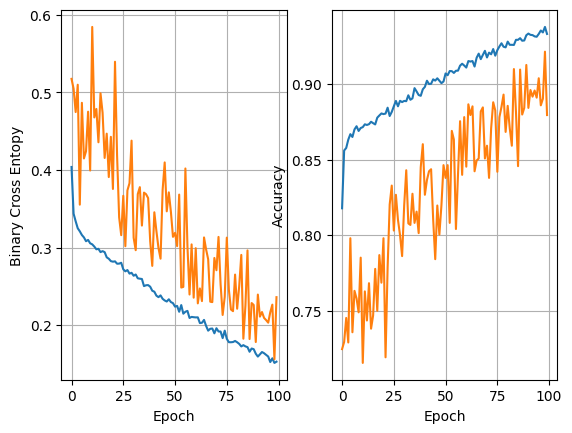

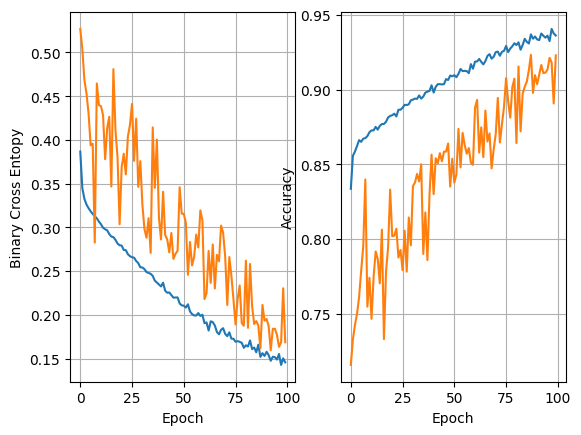

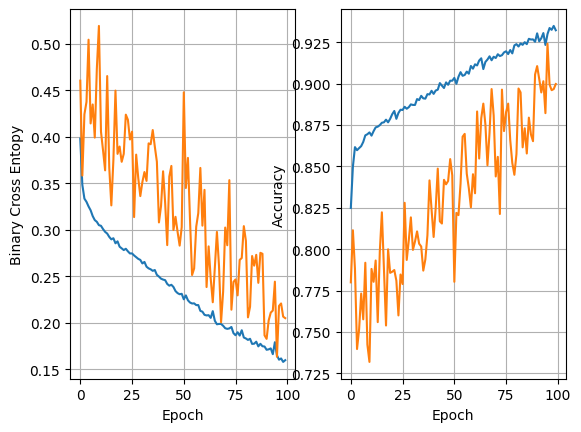

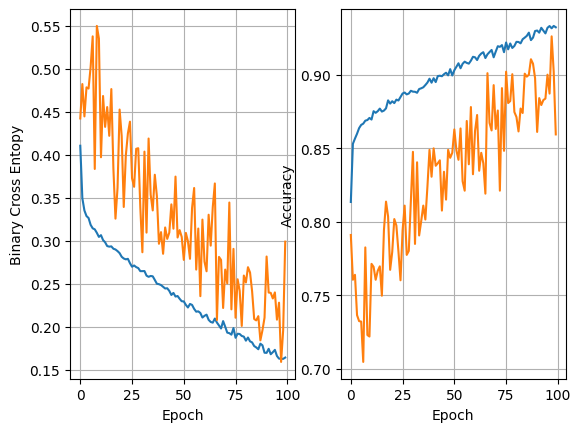

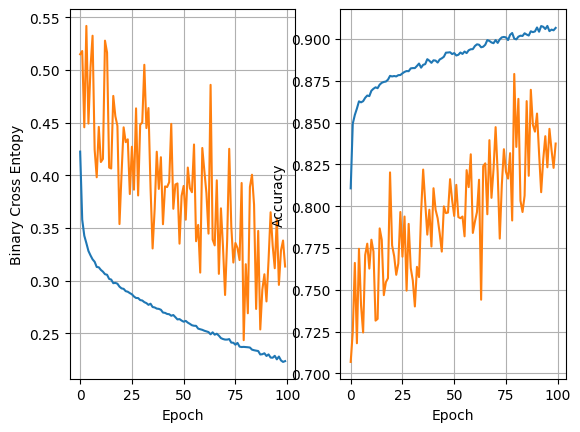

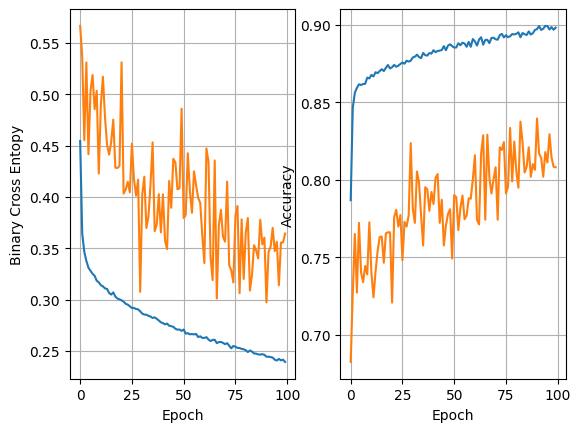

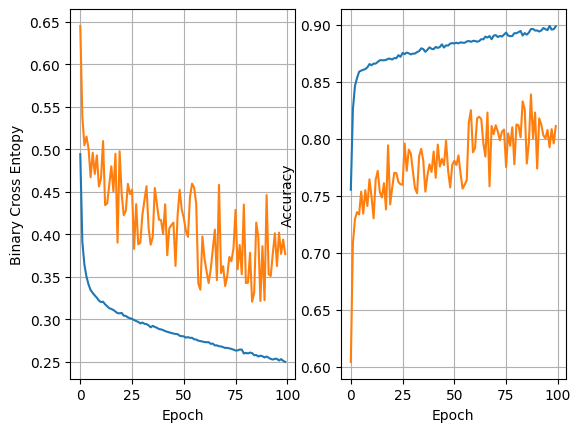

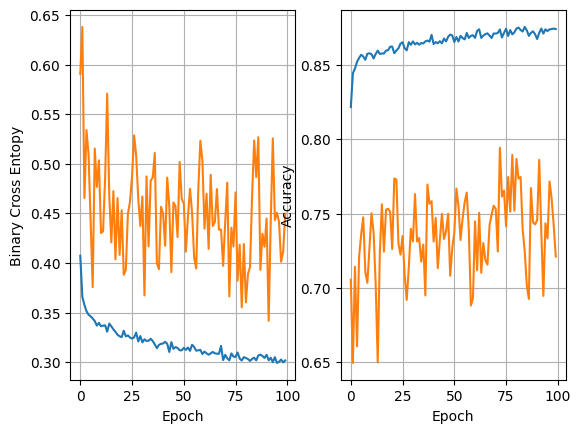

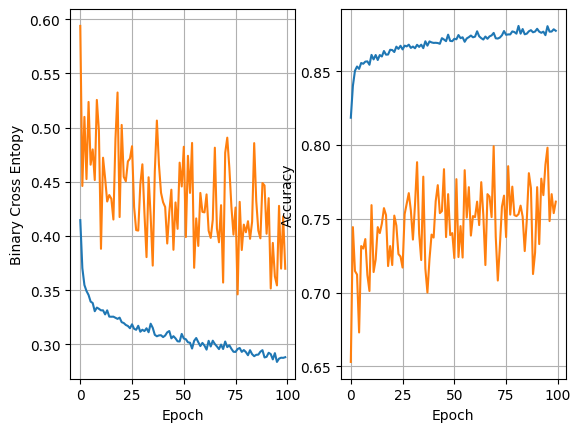

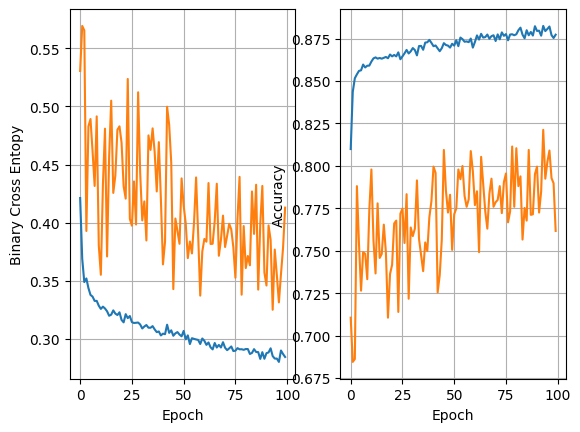

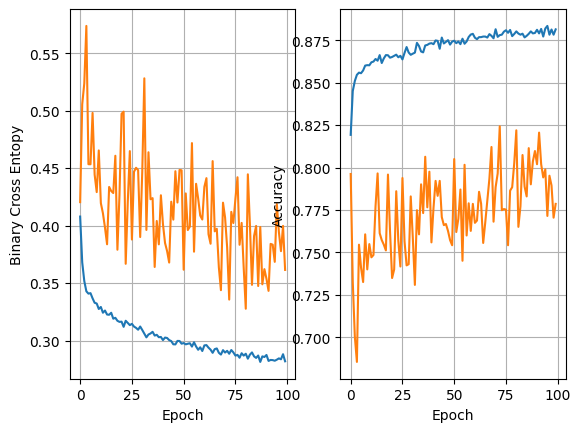

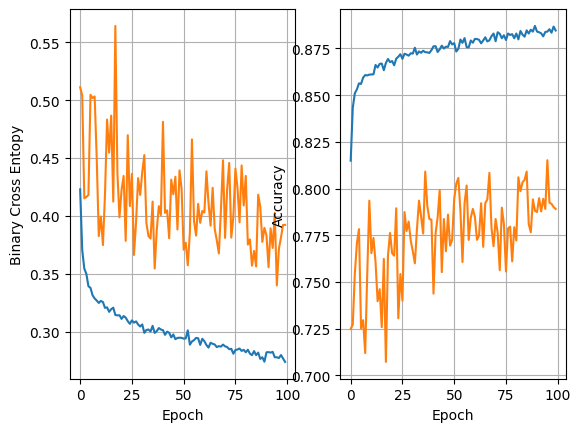

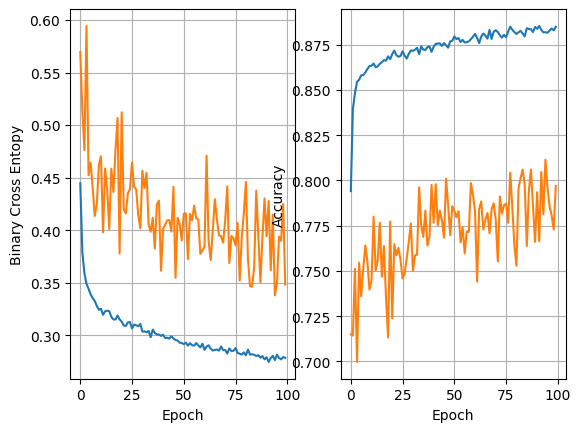

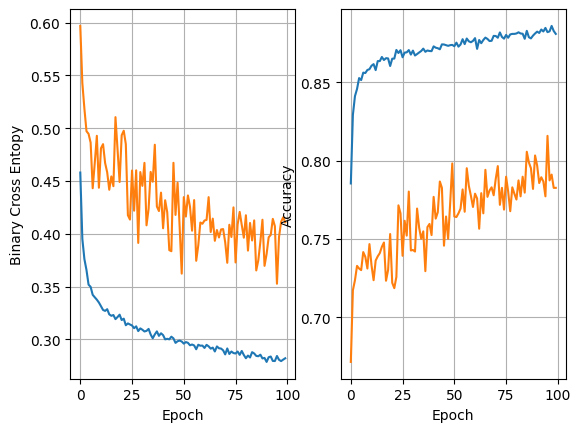

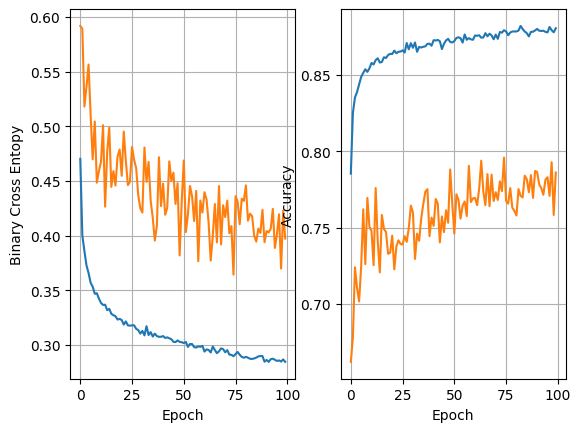

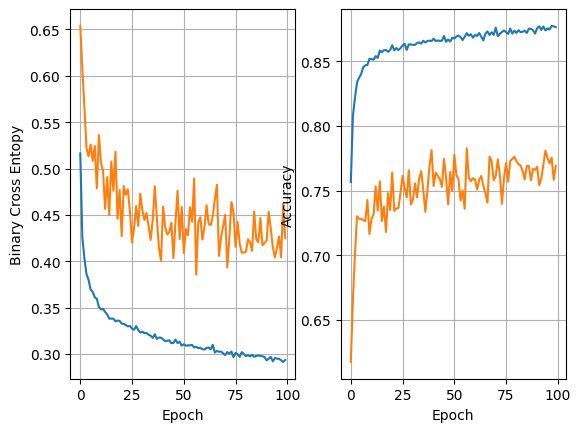

In [67]:
least_val_loss = float('inf')
least_loss_model = None
best_epoch = None
best_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
      for lr in [0.01, 0.005, 0.001]:
        for batch_size in [32, 64, 128]:
          print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
          model, history = train_nn_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
          plot_history(history)
          val_loss = model.evaluate(x_valid, y_valid)[1]
          print(f"Validation loss: {val_loss}")
          if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model



In [68]:
least_val_loss

0.8467402458190918

In [71]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1367
           1       0.87      0.89      0.88      2437

    accuracy                           0.85      3804
   macro avg       0.84      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804

